<center><h1>Visualization in Python</h1></center>

<center><h2>Matplotlib</h2></center>

In [5]:
#First, import the matplotlib package and give it a shorthand name
import matplotlib as mpl
import matplotlib.pyplot as plt
#Also, we will need numpy to generate sample data
import numpy as np

In [3]:
#Make the package run inline in this notebook
%matplotlib inline

### Basic Line Plots
Perhaps the simplest of all plots is the visualization of simple functions $y = mx+b$.
Here we will take a first look at creating a simple plot of this type.
As with all the following sections, we'll start by setting up the notebook for plotting and importing the packages we will use:

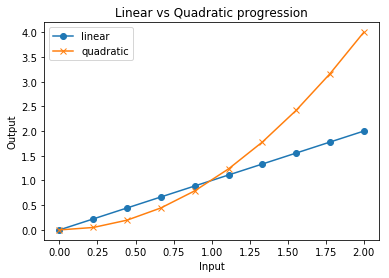

In [6]:
x = np.linspace(0, 2, 10) #Generate some sample data

plt.plot(x, x, 'o-', label='linear') #Make one line a linear plot
plt.plot(x, x ** 2, 'x-', label='quadratic') #Make one line a quadratic plot

plt.legend(loc='best') #Put a legend on the plot in the best location
plt.title('Linear vs Quadratic Regression') #Give it a title
plt.xlabel('Input') #Name the x-axis
plt.ylabel('Output'); #Name the y-axis
plt.show() #Actually show the plot

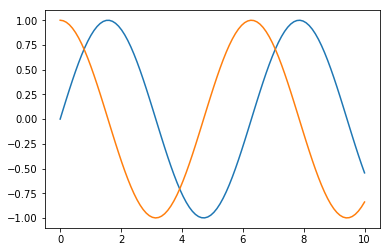

In [28]:
x = np.linspace(0, 10, 100) #Generate some sample data

plt.plot(x, np.sin(x)) #Make a sine line
plt.plot(x, np.cos(x)) #Make a cosine line

plt.show() #Actually show the plot

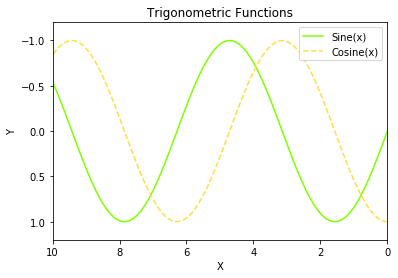

In [30]:
#Customize the look
x = np.linspace(0, 10, 100) #Generate some sample data

plt.plot(x, np.sin(x), linestyle = '-', color = 'chartreuse', label='Sine(x)') #Make a sine line
plt.plot(x, np.cos(x), linestyle = '--', color = '#FFDD44',label='Cosine(x)') #Make a cosine line

plt.legend(loc='best') #Put a legend on the plot in the best location
plt.title('Trigonometric Functions') #Give it a title
plt.xlabel('X') #Name the x-axis
plt.ylabel('Y'); #Name the y-axis
plt.xlim(10, 0)
plt.ylim(1.2, -1.2);
plt.show() #Actually show the plot

### Histograms
A simple histogram can be a great first step in understanding a dataset. You can easily view a dataset's distribution, which can help determine which types of statistcal tests you should use on the data.

(1000,)
float64
[ 2.09948175  1.33561875  0.68273281  1.81671838  0.94105811  0.85937859
  1.21718798  0.45989119  1.19809752  1.03255562  2.05841252  0.78191677
  0.93002511  0.31328116  1.25837083  1.18980728  0.51991983  2.20595769
  0.54638352  1.58603175  1.78807725  1.28184886  0.54716003  0.22527457
  0.53263994  1.03505316  0.90415588  0.23949082  0.89961488  1.22041588]


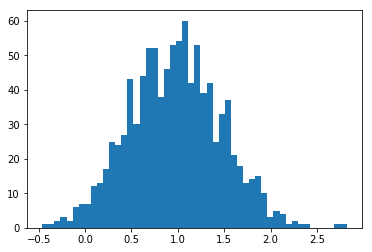

In [7]:
# Gaussian, mean 1, stddev .5, 1000 elements
samples = np.random.normal(loc=1.0, scale=0.5, size=1000) #Generate some sample data
print(samples.shape) #Returns the size of the data (mxn)
print(samples.dtype) #Returns the object's type
print(samples[:30]) #Return 30 records to view
plt.hist(samples, bins=50); #Plot a histogram using 50 bins
plt.show() #Show the plot

#### Two Histograms on the Same Plot

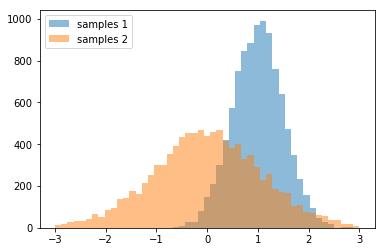

In [8]:
samples_1 = np.random.normal(loc=1, scale=.5, size=10000) #Normal distribution
samples_2 = np.random.standard_t(df=10, size=10000) #Student's t distribution
bins = np.linspace(-3, 3, 50) #Creates 50 bins between -3 and 3 std. dev.

# Set an alpha and use the same bins since we are plotting two hists
plt.hist(samples_1, bins=bins, alpha=0.5, label='samples 1') 
plt.hist(samples_2, bins=bins, alpha=0.5, label='samples 2')
plt.legend(loc='upper left'); #Place the lengend in the top left
plt.show() #Show the plot

### Two-Dimensional Histograms
Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

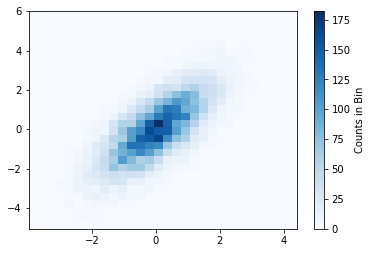

In [33]:
mean = [0, 0] #Define means for x and y
cov = [[1, 1], [1, 2]] #Define covariances for x and y
x, y = np.random.multivariate_normal(mean, cov, 10000).T #Create a sample multivariate distribution

plt.hist2d(x, y, bins=30, cmap='Blues') #Plot the 2D histogram using the sample data
cb = plt.colorbar() #Show the color legend
cb.set_label('Counts in Bin') #Give the legend a title

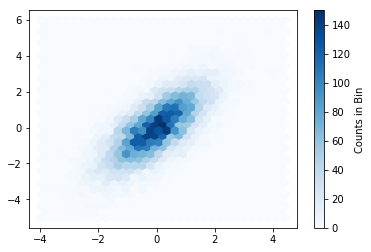

In [34]:
#Try out the hexagonal binnings function
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='Counts in Bin')

### Scatterplots

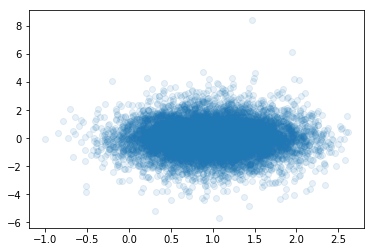

In [31]:
samples_1 = np.random.normal(loc=1, scale=.5, size=10000) #Normal distribution
samples_2 = np.random.standard_t(df=10, size=10000) #Student's t distribution
#Generate a scatterplot (with partially transparent points)
plt.scatter(samples_1, samples_2, alpha=0.1);
plt.show() #Show the plot

### Using Panels
You can use panels to plot multiple visualizations in a specified layout. Simply specify the number of rows and columns you need as well as the location for each plot output, and ```matplotlib``` will organize them for you.

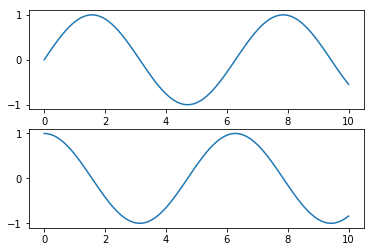

In [27]:
plt.figure()  # create a plot figure

x = np.linspace(0, 10, 100) #Generate some sample data
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

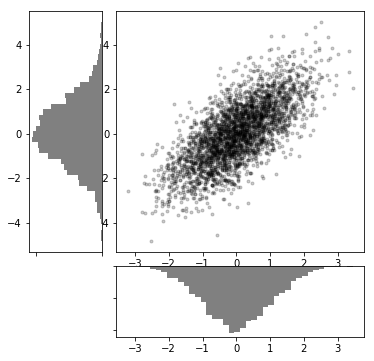

In [37]:
#A more advanced example to show distributions and scatterplot together
# Create some normally distributed data
mean = [0, 0]  #Define means for x and y
cov = [[1, 1], [1, 2]]  #Define covariances for x and y
x, y = np.random.multivariate_normal(mean, cov, 3000).T #Create a sample multivariate distribution

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histograms on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()